In [12]:
import torch
import torch.nn as nn # 方便与对于网络中层的使用
from torch.optim import SGD
import torch.utils.data as Data # 进行数据的预处理
from sklearn.datasets import load_boston # 导入数据
from sklearn.preprocessing import StandardScaler # 数据标准化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# 使用定义网络的时候使用nn.Sequential的形式
class MLPmodel2(nn.Module):
    def __init__(self):
        super(MLPmodel2,self).__init__()
        # 定义隐藏层
        self.hidden=nn.Sequential(
            nn.Linear(13,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
        )
        # 预测回归层
        self.regression=nn.Linear(10,1)
        # 定义网络的前向传播途径
    def forward(self,x):
        x=self.hidden(x)
        output=self.regression(x)
        return output

In [14]:
# 输出网格结构
mlp2=MLPmodel2()
print(mlp2)

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


boston_X.shape: (506, 13)


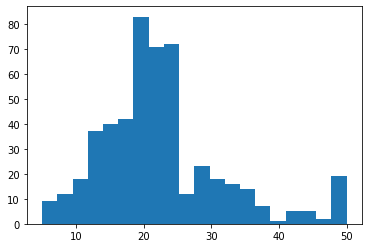

In [15]:
# 读取数据
boston_X,boston_y=load_boston(return_X_y=True)
print("boston_X.shape:",boston_X.shape)
plt.figure()
plt.hist(boston_y,bins=20)
plt.show()

In [16]:
# 数据标准化处理
ss=StandardScaler(with_mean=True,with_std=True)
boston_Xs=ss.fit_transform(boston_X)
# 将数据集预处理为可以使用pytorch进行批量训练的形式
# 训练集x转化为张量
train_xt=torch.from_numpy(boston_Xs.astype(np.float32))
# 训练集y转化为张量
trian_yt=torch.from_numpy(boston_y.astype(np.float32))
# 将训练集转化为张量，使用TensorDataset将x和y整合到一起
trian_data=Data.TensorDataset(train_xt,trian_yt)
# 定义一个数据加载器，将训练数据集进行批量处理
train_loader=Data.DataLoader(
    dataset=trian_data, # 使用的数据集
    batch_size=128,# 批处理的样本大小
    shuffle=True,# 每次迭代之前打乱数据
    num_workers=1# 使用两个进程
)

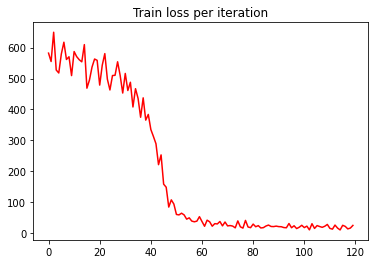

In [17]:

# 对于回归模型mlp2进行训练并输出损失函数的变化情况，定义优化器和损失函数
optimizer=SGD(mlp2.parameters(),lr=0.001)
loss_func=nn.MSELoss() # 最小均方根误差
train_loss_all=[] # 输出每个批次训练的损失函数
# 进行训练，并输出每次迭代的损失函数
for epoch in range(30):
    # 对训练数据的加载器进行迭代运算
    for step,(b_x,b_y) in enumerate(train_loader):
        output=mlp2(b_x).flatten() # mlp在旋律batch上的输出
        train_loss=loss_func(output,b_y) # 均方根误差
        optimizer.zero_grad() # 每个迭代步的梯度初始化为0
        train_loss.backward() # 损失的后向传播，计算梯度
        optimizer.step() # 使用梯度进行优化
        train_loss_all.append(train_loss.item())
plt.figure()
plt.plot(train_loss_all,"r-")
plt.title("Train loss per iteration")
plt.show()

In [25]:
# 保存整个模型
torch.save(mlp2,"data/chap3/mlp2.pkl")
# 导入保存的模型
mlp2load=torch.load("data/chap3/mlp2.pkl")
print(mlp2load)

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [26]:
torch.save(mlp2.state_dict(),"data/chap3/mlp2_parm.pkl")
# 导入保存的模型的参数
mlp2parm=torch.load("data/chap3/mlp2_parm.pkl")
